In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import image, plotting
from sklearn.metrics import mean_squared_error
import ptn_script as ptn

In [11]:
#path to matrices
path = '/mnt/c/Users/liz/Desktop/course-materials-2020/fMRI_HCP/HCP_PTN1200_recon2/netmats1_clean.txt'


## 1. Load Data

In [12]:
traits = pd.read_csv('all_traits.csv')
neuroticism  = traits['NEOFAC_N'].to_numpy()
#netmats = np.loadtxt('netmats2_clean.txt',max_rows=3)
netmats = np.loadtxt(path)
#to load only a few subjects to test use max_rows=int and set
#neuroticism = neuroticism[:3]

### 1.1 X_features - subjects' matrices

In [13]:
X_features = netmats
X_features.shape

(810, 40000)

Text(0, 0.5, 'subjects')

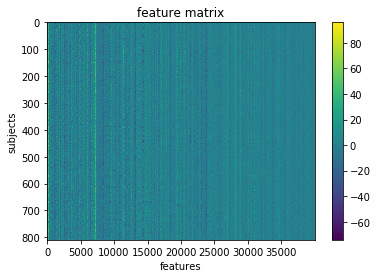

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X_features, aspect='auto')
plt.colorbar()
plt.title('feature matrix')
plt.xlabel('features')
plt.ylabel('subjects')

### 1.2 Different scores of personality traits (Y) 

In [16]:
traits.head()

,Subject,NEOFAC_N,NEOFAC_E,NEOFAC_O,NEOFAC_C,NEOFAC_A
0,100206,21.0,32.0,23.0,26.0,29.0
1,100610,7.0,15.0,33.0,36.0,31.0
2,101006,13.0,29.0,23.0,39.0,30.0
3,101107,12.0,28.0,35.0,37.0,28.0
4,101309,2.0,26.0,22.0,36.0,36.0


In [17]:
traits.describe()

,Subject,NEOFAC_N,NEOFAC_E,NEOFAC_O,NEOFAC_C,NEOFAC_A
count,810.000000,810.000000,810.000000,810.000000,810.000000,810.000000
mean,375840.291358,16.464198,30.867901,28.683951,34.322222,33.406173
std,269851.464055,7.522974,5.864863,6.233318,5.974493,5.817302
min,100206.000000,0.000000,10.000000,10.000000,11.000000,10.000000
25%,156460.250000,12.000000,27.000000,24.000000,31.000000,30.000000
50%,215926.000000,16.000000,31.000000,28.000000,35.000000,33.500000
75%,580574.250000,21.000000,35.000000,33.000000,38.000000,37.000000
max,996782.000000,43.000000,47.000000,47.000000,48.000000,48.000000


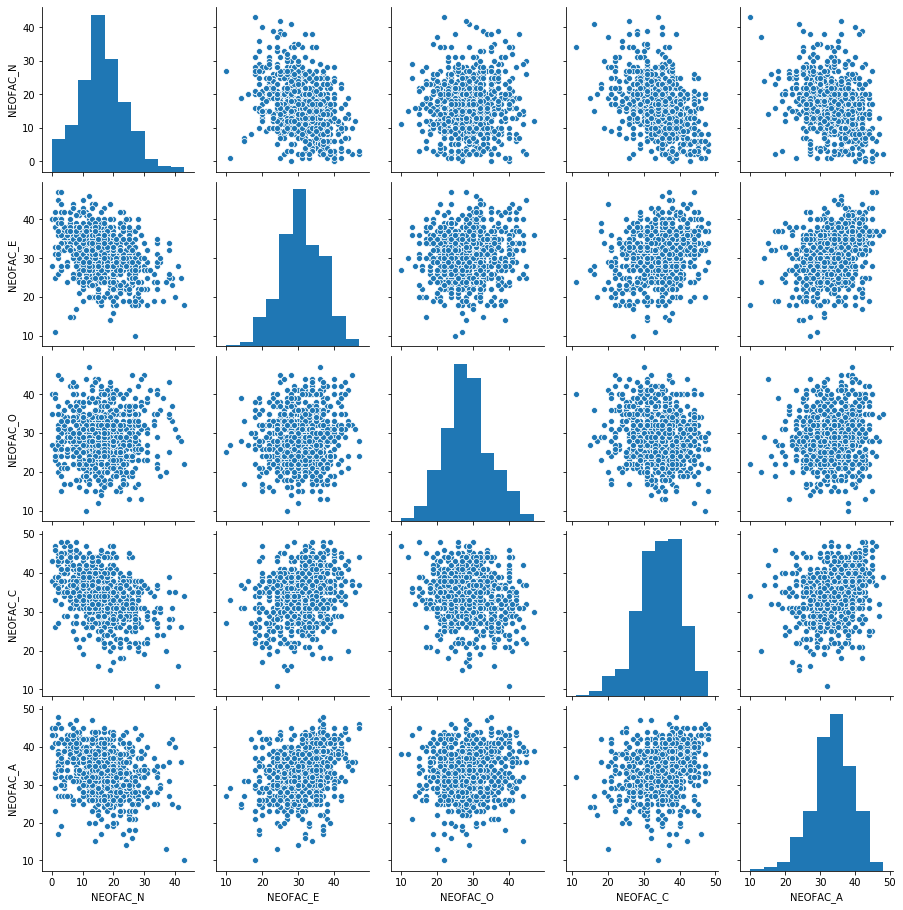

In [18]:
sns.pairplot(traits.drop('Subject', axis=1), kind ='scatter')

In [33]:
score_n = traits['NEOFAC_N']
score_n.value_counts()

28.0    59
29.0    56
27.0    54
26.0    51
32.0    49
24.0    48
30.0    42
25.0    41
31.0    40
22.0    39
23.0    35
35.0    34
33.0    31
21.0    26
34.0    24
36.0    21
40.0    18
37.0    18
20.0    17
38.0    17
19.0    14
41.0    11
39.0    11
18.0    10
17.0     9
42.0     7
15.0     6
44.0     5
16.0     4
43.0     4
45.0     3
13.0     2
47.0     1
10.0     1
12.0     1
14.0     1
Name: NEOFAC_O, dtype: int64

## 2. Try Models

### 2.1 Connectome-based Predictive Modeling (CPM)
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5526681/

Takes the connectivity matrices and turns them into a one (or two) dimensional summary score based on the correlation of the edges with the behavioural metric being predicted and does a simple linear regression. Very simple method to use as baseline for prediction accuracy, but does not have much to interpret.

In [8]:
pred,edge_count = ptn.leave_one_out_CPM(netmats,neuroticism)

/home/annabelle/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


CPM fold:  0


/home/annabelle/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/annabelle/miniconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3508: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())


In [10]:
MSE = [['combined',mean_squared_error(neuroticism,pred[:,0])],
            ['positive',mean_squared_error(neuroticism,pred[:,1])],
           ['negative',mean_squared_error(neuroticism,pred[:,2])],
           ['multiple_reg',mean_squared_error(neuroticism,pred[:,3])]]

In [11]:
print(MSE)

[['combined', 74.0], ['positive', 74.0], ['negative', 74.0], ['multiple_reg', 74.0]]


### 2.2 Vizualize connectomes

issue: dont have labels of nodes! cannot make more meaningful plots or comparisons without edge labels

In [ ]:
# ICA map
path2 = './HCP_PTN1200_recon2/groupICA_3T_HCP1200_MSMAll/groupICA/groupICA_3T_HCP1200_MSMAll_d200.ica/{}'
#ICA_map = image.load_img(path2.format('melodic_IC_sum.nii'))
coords = plotting.find_probabilistic_atlas_cut_coords(ICA_map)

In [ ]:
#find most extreme values of scores in full 810 sample
scores_total = np.matmul(netmats,mask)
pos_scores_total = np.matmul(netmats,pos_mask)
neg_scores_total = np.matmul(netmats,neg_mask)

min_scores = scores_total.argmin()
max_scores = scores_total.argmax()

min_pos = pos_scores_total.argmin()
max_pos = pos_scores_total.argmax()

min_neg = neg_scores_total.argmin()
max_neg = neg_scores_total.argmax()

In [ ]:
mean = netmats.mean(axis=0).reshape(-1,200)

In [ ]:
#average connectome of all subjects
view = plotting.view_connectome(mean, coords, edge_cmap = 'Spectral',edge_threshold = 8)
view

In [ ]:
#connectome of subject with very high neuroticism (max negative score)
view = plotting.view_connectome(netmats[max_neg].reshape(-1,200), coords, edge_cmap = 'Spectral',edge_threshold = 8)
view

In [ ]:
#connectome of subject with low neuroticism (minimum positive score)
view = plotting.view_connectome(netmats[min_pos].reshape(-1,200), coords, edge_cmap = 'Spectral',edge_threshold = 8)
view

### 2.3 Split the data to train and test, use cross-validation on the train data and try SVR

In [34]:
from sklearn.model_selection import train_test_split

# Split the sample to training/validation with a 60/40 ratio, and 
# stratify by neuroticsm score, and also shuffle the data.

X_train, X_val, y_train, y_val = train_test_split(
                                                    X_features, # x
                                                    score_n, # y
                                                    test_size = 0.4, # 60%/40% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    #stratify = score_n,  # keep
                                                                           # distribution
                                                                           # of ageclass
                                                                           # consistent
                                                                           # betw. train
                                                                           # & test sets.
                                                    random_state = 123 # same shuffle each
                                                                       # time
                                                                       )

# print the size of our training and test groups
print('training:', len(X_train),
     'testing:', len(X_val))

training: 486 testing: 324


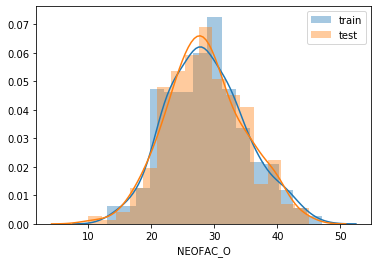

In [35]:
#Examine the distributions of y_train and y_test
sns.distplot(y_train,label='train')
sns.distplot(y_val,label='test')
plt.legend()

#### Split the train data to train and test

In [36]:
from sklearn.model_selection import train_test_split

# Split the sample to training/test with a 75/25 ratio, and 
# stratify by age class, and also shuffle the data.

#age_class2 = pheno.loc[y_train.index,'AgeGroup']

X_train2, X_test, y_train2, y_test = train_test_split(
                                                    X_train, # x
                                                    y_train, # y
                                                    test_size = 0.25, # 75%/25% split  
                                                    shuffle = True, # shuffle dataset
                                                                    # before splitting
                                                    #stratify = age_class2,  # keep
                                                                           # distribution
                                                                           # of ageclass
                                                                           # consistent
                                                                           # betw. train
                                                                           # & test sets.
                                                    random_state = 123 # same shuffle each
                                                                       # time
                                                                       )

# print the size of our training and test groups
print('training:', len(X_train2),
     'testing:', len(X_test))

training: 364 testing: 122


In [37]:
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVR
l_svr = SVR(kernel='linear') # define the model

# fit model just to training data
l_svr.fit(X_train2,y_train2)

# predict the *test* data based on the model trained on X_train2
y_pred = l_svr.predict(X_test) 

# caluclate the model accuracy
acc = l_svr.score(X_test, y_test) 
mae = mean_absolute_error(y_true=y_test,y_pred=y_pred)

accuracy (R2) =  -0.07073801922689893
MAE =  5.082957554520965


Text(0.5, 0, 'Predicted Score_N')

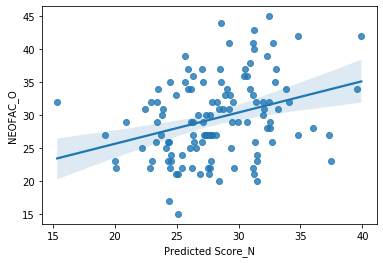

In [38]:
# print results
print('accuracy (R2) = ', acc)
print('MAE = ',mae)

sns.regplot(y_pred,y_test)
plt.xlabel('Predicted Score_N')

#### Use cross-validation

In [42]:
#Cross-validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# predict
y_pred = cross_val_predict(l_svr, X_train2, y_train2, cv=10)
# scores
acc = cross_val_score(l_svr, X_train2, y_train2, cv=10)
mae = cross_val_score(l_svr, X_train2, y_train2, cv=10, scoring='neg_mean_absolute_error')

In [40]:
for i in range(10):
    print('Fold {} -- Acc = {}, MAE = {}'.format(i, acc[i],-mae[i]))

Fold 0 -- Acc = 0.08119269806610051, MAE = 4.1916158739160565
Fold 1 -- Acc = -0.1678369401978759, MAE = 5.065099886708033
Fold 2 -- Acc = -0.200820432871601, MAE = 5.741397635624055
Fold 3 -- Acc = 0.23968958635967363, MAE = 4.707151501886951
Fold 4 -- Acc = -0.6817362454175424, MAE = 4.962054426723379
Fold 5 -- Acc = -0.22441018298864135, MAE = 5.35853248358206
Fold 6 -- Acc = -0.17468481686333037, MAE = 6.221930433068749
Fold 7 -- Acc = 0.06790102305090073, MAE = 5.4629520049611315
Fold 8 -- Acc = -0.23222602628327582, MAE = 5.267332205854683
Fold 9 -- Acc = -0.07700438804988718, MAE = 5.310221806772886


R2: -0.09637596752318056
MAE: 5.226056971697827


Text(0.5, 0, 'Predicted Score_N')

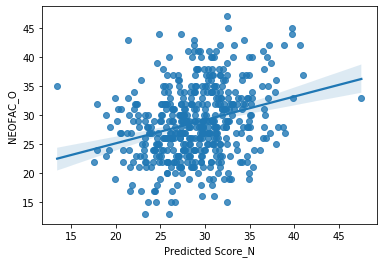

In [41]:
from sklearn.metrics import r2_score

overall_acc = r2_score(y_train2, y_pred)
overall_mae = mean_absolute_error(y_train2,y_pred)
print('R2:',overall_acc)
print('MAE:',overall_mae)

sns.regplot(y_pred, y_train2)
plt.xlabel('Predicted Score_N')

#### Try a more complicated model

In [ ]:
from sklearn.model_selection import validation_curve

#degree_range = list(range(1,8)) # A range of different values for degree
epsilon_range = 10. ** np.arange(-1, 3)

train_scores, valid_scores = validation_curve(SVR(kernel='linear',
                                                  gamma='scale'
                                                 ), 
                                              X=X_train, y=y_train, 
                                              param_name= "epsilon",
                                              epsilon=epsilon_range,
                                              cv=10,
                                             scoring='neg_mean_squared_error')

In [ ]:
tScores = pd.DataFrame(train_scores).stack().reset_index()
tScores.columns = ['Degree','Fold','Score']
tScores.loc[:,'Type'] = ['Train' for x in range(len(tScores))]

vScores = pd.DataFrame(valid_scores).stack().reset_index()
vScores.columns = ['Degree','Fold','Score']
vScores.loc[:,'Type'] = ['Validate' for x in range(len(vScores))]

ValCurves = pd.concat([tScores,vScores]).reset_index(drop=True)
ValCurves.head()

In [ ]:
#plot results
g = sns.catplot(x='Degree',y='Score',hue='Type',data=ValCurves,kind='point')
plt.xticks(range(7))
g.set_xticklabels(degree_range, rotation=90)

### 2.4 Try simple neural network

In [51]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, max_iter=1000, learning_rate_init=0.01).fit(X_train, y_train)


In [ ]:
#Cross-validation
from sklearn.model_selection import cross_val_predict, cross_val_score

# predict
y_pred = cross_val_predict(regr, X_train, y_train, cv=10)
# scores
acc = cross_val_score(regr, X_train, y_train, cv=10)
mae = cross_val_score(regr, X_train, y_train, cv=10, scoring='neg_mean_absolute_error')

In [53]:
regr.predict(X_test)

regr.score(X_test, y_test)

-23.3467701145507